In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set some plotting styles
plt.style.use('ggplot')
sns.set_context("talk")


In [3]:
# Load the processed data
DATA_PATH = '../data/processed/merged_solar_weather_data.csv'
df = pd.read_csv(DATA_PATH, index_col='timestamp', parse_dates=True)

In [5]:
# --- 1. Initial Inspection ---
print("--- Data Overview ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2023-06-28 00:00:00+00:00 to 2025-06-27 23:00:00+00:00
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solar_generation_mw      17544 non-null  float64
 1   temperature_2m (°C)      17544 non-null  float64
 2   precipitation (mm)       17544 non-null  float64
 3   weather_code (wmo code)  17544 non-null  float64
 4   cloud_cover_low (%)      17544 non-null  float64
 5   cloud_cover_mid (%)      17544 non-null  float64
 6   cloud_cover_high (%)     17544 non-null  float64
 7   wind_speed_10m (km/h)    17544 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB
None

--- Statistical Summary ---
       solar_generation_mw  temperature_2m (°C)  precipitation (mm)  \
count         17544.000000         17544.000000        17544.000000   
mean           1710.026769            11.440145            0.092345


Plotting solar generation over time...


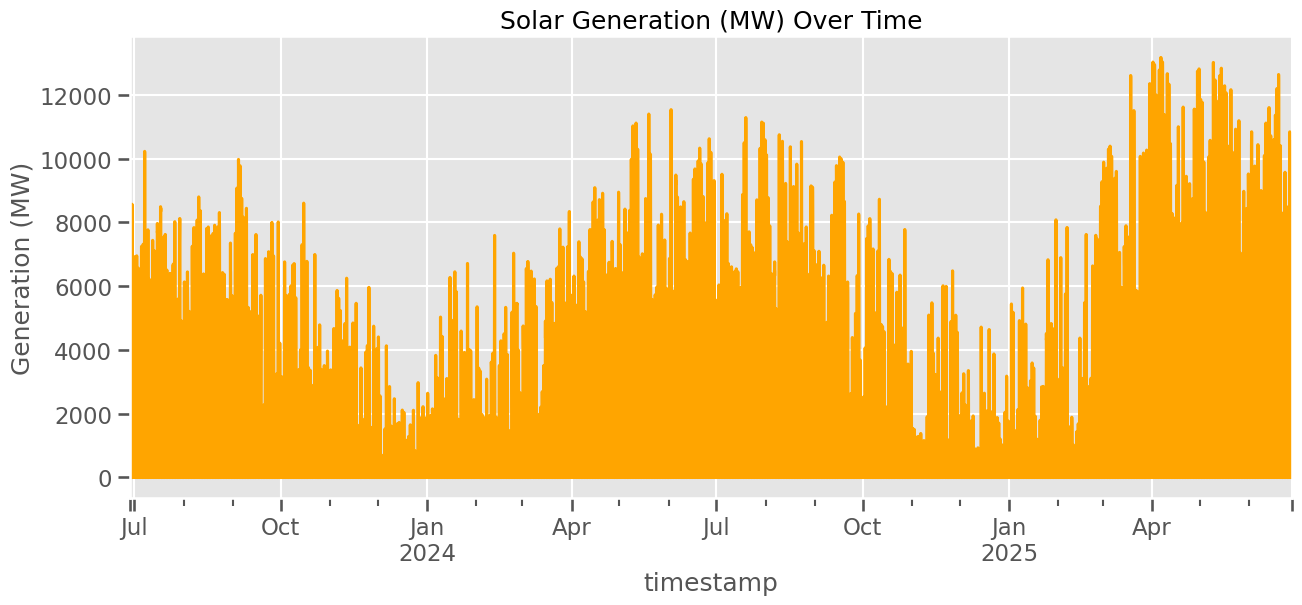

In [6]:
# --- 2. Visualize the Target Variable (Solar Generation) ---

print("\nPlotting solar generation over time...")
df['solar_generation_mw'].plot(figsize=(15, 6), title='Solar Generation (MW) Over Time', color='orange')
plt.ylabel('Generation (MW)')
plt.show()


Plotting one week of solar generation...


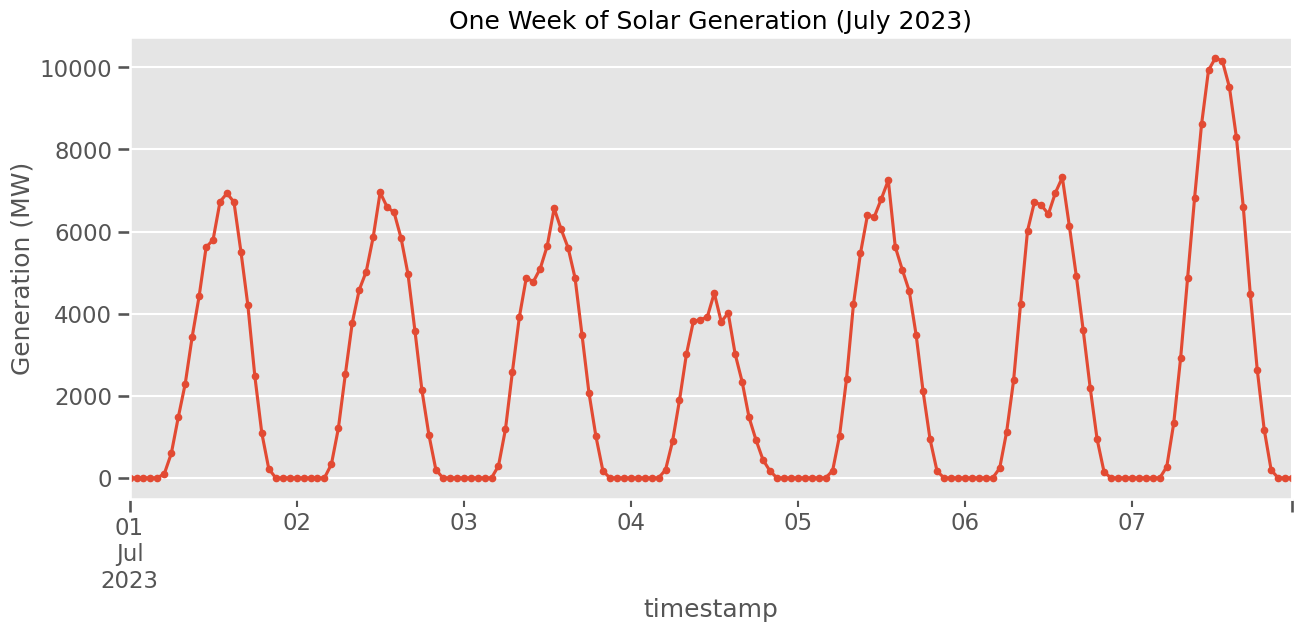

In [9]:
# Let's look at one week to see the daily pattern
print("Plotting one week of solar generation...")
df['solar_generation_mw'].loc['2023-07-01':'2023-07-07'].plot(figsize=(15, 6), title='One Week of Solar Generation (July 2023)', marker='.')
plt.ylabel('Generation (MW)')
plt.show()


Calculating correlation matrix...


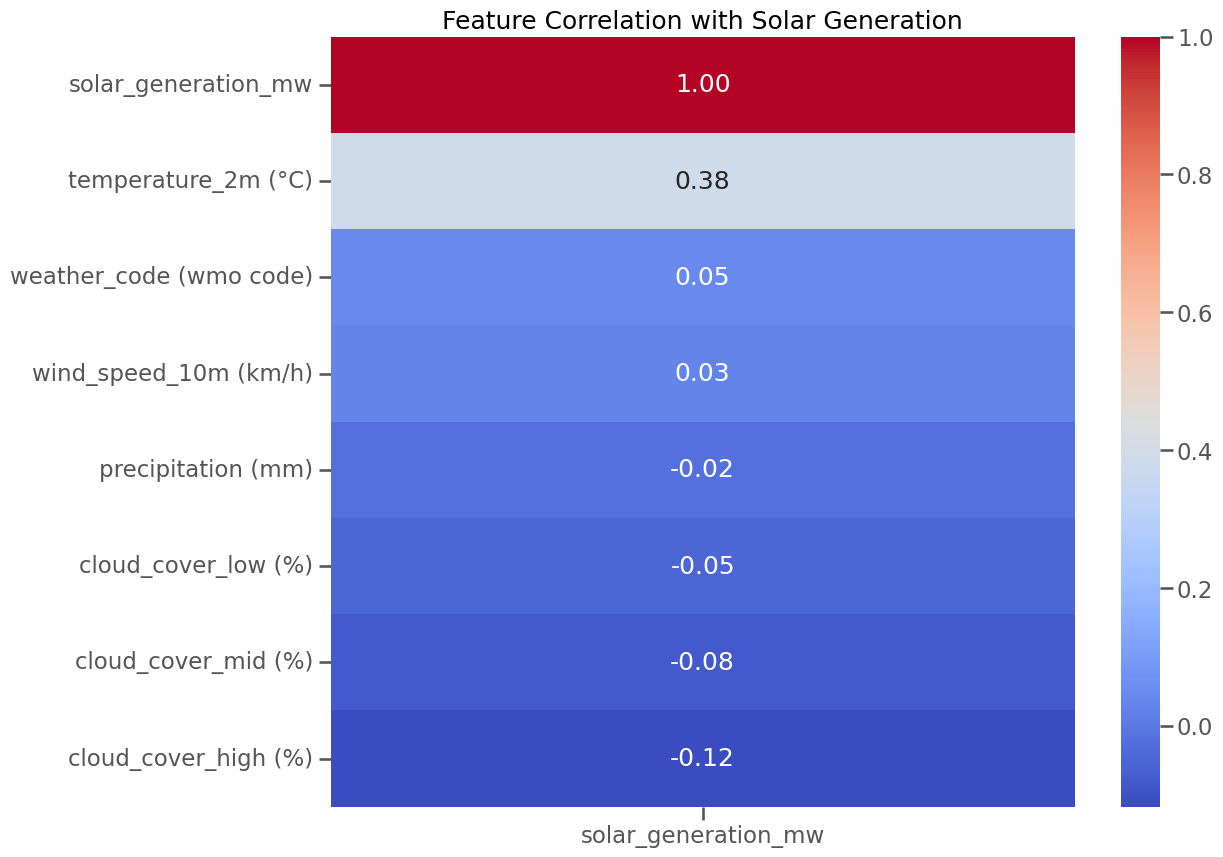

In [10]:
# --- 3. Check for Correlations ---
# What weather features are most related to solar generation?
print("\nCalculating correlation matrix...")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['solar_generation_mw']].sort_values(by='solar_generation_mw', ascending=False),
            annot=True,
            cmap='coolwarm',
            fmt=".2f")
plt.title('Feature Correlation with Solar Generation')
plt.show()